In [2]:
# CELL1 – 1 mark
# Read the data in “2017Health.txt” into a tabular data structure as follows: 
# –  make the county (i.e., Alachua, Baker…) the index of the returned data structure;
# –  the first column of the returned data structure represents the “Years of Potential Life Lost Rate”;
# –  the second column represents the “Teen Birth Rate”;
# –  the third column represents the “Violent Crime Rate”;
# –  the last column represents the “Percentage Smokers”.
# Display the returned tabular data structure in your programme.
################################################################################################################################
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats

health = pd.read_table('2017Health.txt', index_col='County')
health.index.name = None
health = health.drop('State', axis=1)
print(health)

# create series for columns
teen_birth = health['Teen Birth Rate'].values
violent_crime = health['Violent Crime Rate'].values
smokers = health['Percentage Smokers'].values
ypll = health['Years of Potential Life Lost Rate'].values

Populating the interactive namespace from numpy and matplotlib
            Years of Potential Life Lost Rate  Teen Birth Rate  \
Alachua                                  6633               19   
Baker                                    8270               58   
Bay                                      9168               50   
Bradford                                10346               61   
Brevard                                  7722               25   
...                                       ...              ...   
Taylor                                   7875               64   
Volusia                                  8295               32   
Wakulla                                  7548               31   
Walton                                   7962               45   
Washington                               8390               54   

            Violent Crime Rate  Percentage Smokers  
Alachua                    579                  16  
Baker                      360        

In [3]:
# CELL2 – 5 marks
# Analyse the data contained in the variable called “Percentage Smokers”.
# –  Print the “mean of Percentage Smokers”.
# –  Print the “minimum of Percentage Smokers”.
# –  Print the “maximum of Percentage Smokers”.
# –  Print the “standard deviation of Percentage Smokers”.
# –  Print the “95% confidence interval of Percentage Smokers”.

# stats
smokers_mean = np.mean(smokers)
smokers_min = np.min(smokers)
smokers_max = np.max(smokers)
smokers_std = np.std(smokers)

# error
smokers_err = 1.96 * smokers_std / np.sqrt(len(smokers))
smokers_lower_CI = smokers_mean - smokers_err
smokers_upper_CI = smokers_mean + smokers_err

print("Mean of Percentage Smokers =", np.round(smokers_mean, 2))
print("Min of Percentage Smokers =", smokers_min)
print("Max of Percentage Smokers =", smokers_max)
print("Standard deviation of Percentage Smokers =", np.round(smokers_std, 2))
print("95% confidence interval of Percentage Smokers = [{:.2f} {:.2f}]".format(smokers_lower_CI, smokers_upper_CI))


Mean of Percentage Smokers = 16.92
Min of Percentage Smokers = 11
Max of Percentage Smokers = 21
Standard deviation of Percentage Smokers = 2.37
95% confidence interval of Percentage Smokers = [16.35 17.50]


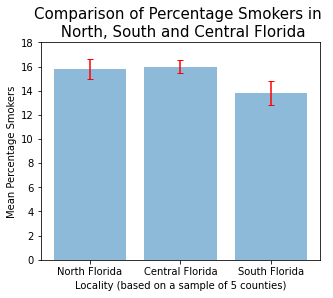

In [4]:
# CELL3 – 9 marks
# Plot a bar graph to compare the “Percentage Smokers” of North Florida, Central Florida and South Florida.

# North Florida: use the measures of the following counties: Duval, Alachua, Leon, Flagler, Marion; 
# Central Florida: use the measures of the following counties: Orange, Polk, Hillsborough, Pinellas, Brevard; 
# South Florida: use the measures of the following counties: Miami-Dade, Broward, Lee, Palm Beach, Sarasota.

# – Visualise as a single plot where: 
# horizonal axis shows the data categories being compared (i.e., North Florida, Central Florida and South Florida); 
# vertical axis represents the mean measure of Percentage Smokers.
# – Add error bars to the bar graph, showing the 95% confidence interval.
# – Add appropriate title, horizontal axis label and vertical axis label to the bar graph.

# create series for each locality
n_florida = health.loc[ ['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion'], ["Percentage Smokers"]].values
c_florida = health.loc[ ['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard'], ["Percentage Smokers"]].values
s_florida = health.loc[ ['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota'], ["Percentage Smokers"]].values

# means
n_florida_mean = np.mean(n_florida)
c_florida_mean = np.mean(c_florida)
s_florida_mean = np.mean(s_florida)

# error
n_florida_error = 1.96 * np.std(n_florida) / np.sqrt(len(n_florida))
c_florida_error = 1.96 * np.std(c_florida) / np.sqrt(len(c_florida))
s_florida_error = 1.96 * np.std(s_florida) / np.sqrt(len(s_florida))

# plot chart
figure(figsize(5,4))
x_values = ['North Florida', 'Central Florida', 'South Florida']
y_values = [n_florida_mean, c_florida_mean, s_florida_mean]
plt.bar([0,1,2], y_values, align='center', alpha=0.5, yerr=[n_florida_error, c_florida_error, s_florida_error], capsize=3, ecolor='r')
plt.xticks([0,1,2], x_values)
plt.ylim([0,18])
plt.yticks(np.arange(0,20,2))
plt.title('Comparison of Percentage Smokers in \n North, South and Central Florida', fontsize=15)
plt.ylabel('Mean Percentage Smokers')
plt.xlabel('Locality (based on a sample of 5 counties)')

# show
plt.show()

In [5]:
# CELL4 – 4 marks
# Build a linear regression model to estimate the “Years of Potential Life Lost Rate (YPLLR)”,
# based on the following two predictor variables: “Teen Birth Rate (TBR)” and “Percentage Smokers (PS)”,
# Print the resulting linear equation in the programme.

import statsmodels.api as sm

# combine variables & add constant column
combined = health[['Teen Birth Rate','Percentage Smokers']]
combined = sm.add_constant(combined)

# fit ordinary least squares regression model
results = sm.OLS(ypll, combined).fit()
# print(results.summary())

intercept = results.params[0]
slope_tbr = results.params[1]
slope_ps = results.params[2]

# y’ = (x1 * slope1) + (x2 * slope2) + intercept
resulting_model = '{y} = ({x1} * {slope1}) + ({x2} * {slope2}) + {intercept}'.format(
        y = 'YPLL', x1 = 'Teen Birth Rate', x2 = 'Percentage Smokers',
        slope1 = str(round(slope_tbr, 2)), slope2 = str(round(slope_ps, 2)), 
        intercept = str(round(intercept, 2)))

print('Resulting model: \n' + resulting_model)

Resulting model: 
YPLL = (Teen Birth Rate * 36.09) + (Percentage Smokers * 225.19) + 2503.14


In [6]:
# CELL5 – 6 marks
# Based on the error of prediction (i.e., the absolute error/difference between the measured “Years of Potential 
# Life Lost Rate” and the predicted “Years of Potential Life Lost Rate”), compare the following two linear models: 
#   Model A: YPLLR = 60.6 × TBR + 5297.06
#   Model B: YPLLR = 1.36 × VCR + 7254.3
# and advise the data analytics team which model should be used. Write code to perform appropriate statistical data analysis.
# – Print the mean absolute error (MAE) of the model A.
# – Print the mean absolute error (MAE) of the model B.
# – Print the main results of the data analysis processes, including normality test and statistical significance test.
# – Print ONE sentence, stating your conclusion and justification on the difference in performance between two models, 
# in terms of predicting the “Years of Potential Life Lost Rate”.

# the values predicted by each model, and the real YPLL values
YPLL_pred_A = 60.6 * health['Teen Birth Rate'] + 5297.06
YPLL_pred_B = 1.36 * health['Violent Crime Rate'] + 7254.3
YPLL_real = health['Years of Potential Life Lost Rate'].values

# absolute error
abs_error_A = abs(YPLL_real - YPLL_pred_A)
abs_error_B = abs(YPLL_real - YPLL_pred_B)

# mean absolute error- smaller MAE is better
MAE_A = np.mean(abs_error_A)
MAE_B = np.mean(abs_error_B)
dif = abs(MAE_A - MAE_B)

print('Model A MAE:', round(MAE_A, 2)) ## smaller
print('Model B MAE:', round(MAE_B, 2))
print('Absolute difference between Model A and B MAE:', round(dif, 2), 'and Model A is closer to the real value')

# to determine appropriate significance test, first check whether data sets are normal
normal_A = stats.shapiro(abs_error_A.values)[1]
normal_B = stats.shapiro(abs_error_B.values)[1]
print('Shapiro test p-value for Model A:', round(normal_A, 4))
print('Shapiro test p-value for Model B:', round(normal_B, 4))
print('Both values are smaller than 0.05, therefore both data sets are non-normal and we can use the Mann-Whitney U test to determine significance:')

# run appropriate significance test
p_value = stats.mannwhitneyu(abs_error_A, abs_error_B)[1]

print('The p-value:', round(p_value, 4), 'is smaller than 0.05, therefore we can say that the difference is is statistically significant: Model A\'s performance better than Model B\'s')

Model A MAE: 948.46
Model B MAE: 1219.42
Absolute difference between Model A and B MAE: 270.96 and Model A is closer to the real value
Shapiro test p-value for Model A: 0.0004
Shapiro test p-value for Model B: 0.0061
Both values are smaller than 0.05, therefore both data sets are non-normal and we can use the Mann-Whitney U test to determine significance:
The p-value: 0.0261 is smaller than 0.05, therefore we can say that the difference is is statistically significant: Model A's performance better than Model B's
